<a href="https://colab.research.google.com/github/yuzengyi/Coordination/blob/main/Coordination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 创建一个包含数据的DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# 计算皮尔逊相关系数
correlation = df['X'].corr(df['Y'])
print("皮尔逊相关系数:", correlation)

皮尔逊相关系数: 0.9999999999999999


In [ ]:
import pandas as pd

# 创建一个包含数据的DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# 计算斯皮尔曼秩相关系数
correlation = df['X'].corr(df['Y'], method='spearman')
print("斯皮尔曼秩相关系数:", correlation)

斯皮尔曼秩相关系数: 0.9999999999999999


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.draw()


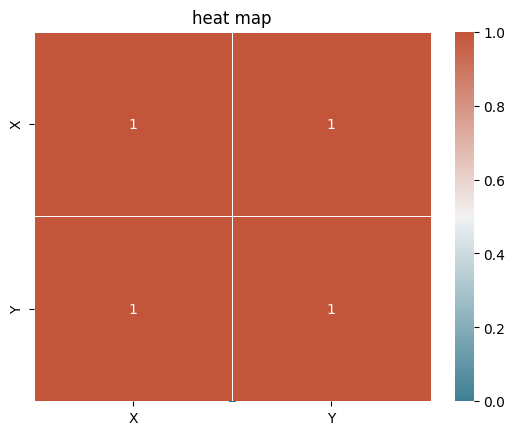

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个包含数据的DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# 绘制散点图和相关性热力图
sns.scatterplot(data=df, x='X', y='Y')
plt.title("散点图")

# 计算并绘制相关性热力图
correlation_matrix = df.corr()

# 创建自定义颜色映射
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=.5,vmin=0, vmax=1)
plt.title("heat map")

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

# 从Excel文件读取数据
file_path = '1.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)


# 计算相关性矩阵
correlation_matrix = df.corr()

# 计算并绘制相关性热力图
correlation_matrix = df.corr()

# 创建自定义颜色映射
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=.5,vmin=0, vmax=1)
plt.title("heat map")
# 显示图形
plt.show()


SyntaxError: ignored

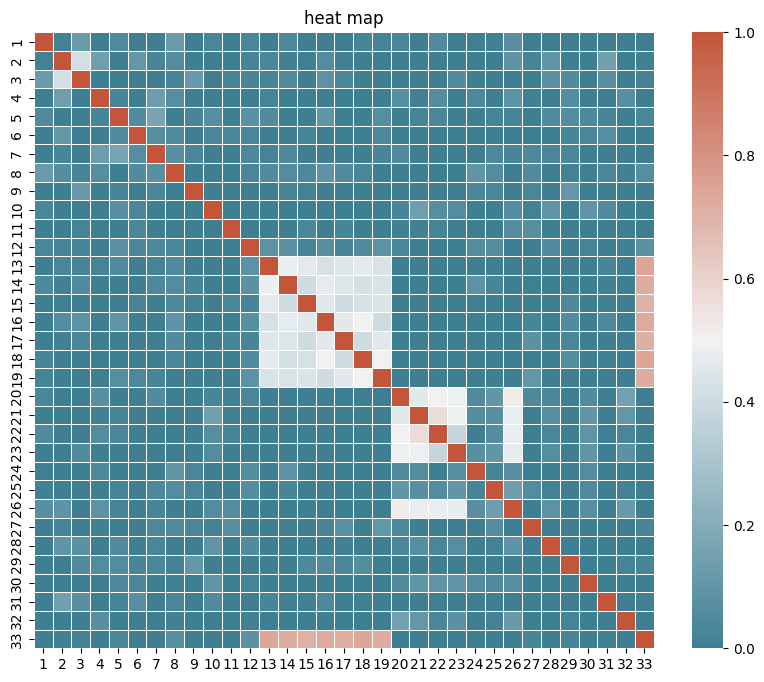

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 从Excel文件读取数据
file_path = '1.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)
# 更改列名为序号
df.columns = range(1, len(df.columns) + 1)
# 计算相关性矩阵
correlation_matrix = df.corr()

# 创建自定义颜色映射
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

# 绘制相关性热力图，去掉标签并设置颜色范围
plt.figure(figsize=(10, 8))  # 设置图形大小
sns.heatmap(correlation_matrix, cmap=custom_cmap, linewidths=.5, vmin=0, vmax=1, annot=False)

plt.title("heat map")
# 显示图形
plt.show()


上述代码属于问卷项目分析，将所有指标进行相关性分析，判断相关性进行适当降维。

In [ ]:
import pandas as pd

# 从Excel文件读取数据
file_path = '1.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)

# 提取测量项的数据列，假设这些列包含在数据框中
measurement_data = df.iloc[:, :33]  # 提取前33列作为测量项，根据实际情况调整列索引范围

# 查看数据类型
data_types = measurement_data.dtypes
print(data_types)

gender                                                                                                                                                                       int64
age                                                                                                                                                                          int64
occupation                                                                                                                                                                   int64
Received vocational education or not                                                                                                                                         int64
Hours of independent study per week                                                                                                                                          int64
Knowledge of the new Vocational Education Act                                                            

In [ ]:
!pip install pingouin
import pandas as pd
import pingouin as pg
import numpy as np

# 从Excel文件读取数据
file_path = '1.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)

# 提取测量项的数据列，假设这些列包含在数据框中
measurement_data = df.iloc[:, :33]  # 提取前33列作为测量项，根据实际情况调整列索引范围
#print(measurement_data)
# 计算Cronbach's α信度系数的函数
def cronbach_alpha(data):
    item_variances = data.var(axis=0, ddof=1)  # 计算测量项的方差，使用ddof=1计算样本方差
    total_score_variance = data.sum(axis=1).var(ddof=1)  # 计算总体测量工具得分的方差
    num_items = len(item_variances)
    alpha = (num_items / (num_items - 1)) * (1 - (np.sum(item_variances) / total_score_variance))
    return alpha

# 计算Cronbach's α信度系数
alpha = cronbach_alpha(measurement_data)
result = pg.cronbach_alpha(data = df)
print(result)
print("Cronbach's α信度系数:", alpha)

(0.1667410982577902, array([0.027, 0.296]))
Cronbach's α信度系数: 0.16674109825779032


In [ ]:
!pip install pingouin
import pandas as pd
import pingouin as pg

#enter survey responses as a DataFrame
df = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                   'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                   'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

result = pg.cronbach_alpha(data = df)
print(result)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=f2b5787408f573451372584c352738207935b9ebf50d02ea6e68bad5d0c20b8b
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
(0.7734375, array([0.336, 0.939]))


问卷的结构效度，是指问卷数据体现的某种结构与测量值的对应程度。在此，
本文采用因子分析的方法，将KMO检验和 Bartlett 球形检验作为观察问卷结构效
度的依据，若 KMO 值大于 0.7，则说明问卷的结构效度良好；若 Bartlett 球形检
验结果显示 sig.<0.05 时，说明各变量具有相关性。

In [ ]:
#!pip install factor_analyzer
import pandas as pd
import numpy as np
import math as math
import numpy as np
from numpy import *
from scipy.stats import bartlett
from factor_analyzer import *
import numpy.linalg as nlg
from sklearn.cluster import KMeans
from matplotlib import cm
import matplotlib.pyplot as plt
def main():
    file_path = '1.xlsx'  # 替换为你的文件路径
    df = pd.read_excel(file_path)
    # print(df)
    df2=df.copy()
    # print("\n原始数据:\n",df2)
    #del df2['ID']
    # print(df2)

    # 皮尔森相关系数
    df2_corr=df2.corr()
    # print("\n相关系数:\n",df2_corr)

    # #热力图
    # cmap = cm.Blues
    # # cmap = cm.hot_r
    # fig=plt.figure()
    # ax=fig.add_subplot(111)
    # map = ax.imshow(df2_corr, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    # plt.title('correlation coefficient--headmap')
    # ax.set_yticks(range(len(df2_corr.columns)))
    # ax.set_yticklabels(df2_corr.columns)
    # ax.set_xticks(range(len(df2_corr)))
    # ax.set_xticklabels(df2_corr.columns)
    # plt.colorbar(map)
    # plt.show()

    # KMO测度
    def kmo(dataset_corr):
        corr_inv = np.linalg.inv(dataset_corr)
        nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
        A = np.ones((nrow_inv_corr, ncol_inv_corr))
        for i in range(0, nrow_inv_corr, 1):
            for j in range(i, ncol_inv_corr, 1):
                A[i, j] = -(corr_inv[i, j]) / (math.sqrt(corr_inv[i, i] * corr_inv[j, j]))
                A[j, i] = A[i, j]
        dataset_corr = np.asarray(dataset_corr)
        kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(A)))
        kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
        kmo_value = kmo_num / kmo_denom
        return kmo_value

    print("\nKMO测度:", kmo(df2_corr))

    # 巴特利特球形检验
    df2_corr1 = df2_corr.values
    print("\n巴特利特球形检验:", bartlett(df2_corr1[0], df2_corr1[1], df2_corr1[2], df2_corr1[3], df2_corr1[4],
                                  df2_corr1[5], df2_corr1[6], df2_corr1[7], df2_corr1[8], df2_corr1[9],
                                  df2_corr1[10], df2_corr1[11], df2_corr1[12], df2_corr1[13], df2_corr1[14]))

    # 求特征值和特征向量
    # eig_value, eigvector = nlg.eig(df2_corr)  # 求矩阵R的全部特征值，构成向量
    # eig = pd.DataFrame()
    # eig['names'] = df2_corr.columns
    # eig['eig_value'] = eig_value
    # eig.sort_values('eig_value', ascending=False, inplace=True)
    # # print("\n特征值\n：",eig)
    # eig1=pd.DataFrame(eigvector)
    # eig1.columns = df2_corr.columns
    # eig1.index = df2_corr.columns
    # # print("\n特征向量\n",eig1)

    # # 求公因子个数m,使用前m个特征值的比重大于85%的标准，选出了公共因子是五个
    # for m in range(1, 15):
    #     if eig['eig_value'][:m].sum() / eig['eig_value'].sum() >= 0.85:
    #         print("\n公因子个数:", m)
    #         break

    # # 因子载荷阵
    # A = np.mat(np.zeros((15, 5)))
    # i = 0
    # j = 0
    # while i < 5:
    #     j = 0
    #     while j < 15:
    #         A[j:, i] = sqrt(eig_value[i]) * eigvector[j, i]
    #         j = j + 1
    #     i = i + 1
    # a = pd.DataFrame(A)
    # a.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5']
    # a.index = df2_corr.columns
    # # print("\n因子载荷阵\n", a)
    # fa = FactorAnalyzer(n_factors=5)
    # fa.loadings_ = a
    # # print(fa.loadings_)
    # print("\n特殊因子方差:\n", fa.get_communalities())  # 特殊因子方差，因子的方差贡献度 ，反映公共因子对变量的贡献
    # var = fa.get_factor_variance()  # 给出贡献率
    # print("\n解释的总方差（即贡献率）:\n", var)

    # # 因子旋转
    # rotator = Rotator()
    # b = pd.DataFrame(rotator.fit_transform(fa.loadings_))
    # b.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5']
    # b.index = df2_corr.columns
    # print("\n因子旋转:\n", b)

    # # 因子得分
    # X1 = np.mat(df2_corr)
    # X1 = nlg.inv(X1)
    # b = np.mat(b)
    # factor_score = np.dot(X1, b)
    # factor_score = pd.DataFrame(factor_score)
    # factor_score.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5']
    # factor_score.index = df2_corr.columns
    # print("\n因子得分：\n", factor_score)
    # fa_t_score = np.dot(np.mat(df2), np.mat(factor_score))
    # print("\n应试者的五个因子得分：\n",pd.DataFrame(fa_t_score))
if __name__ == '__main__':
  main()


KMO测度: 0.42400086042960206

巴特利特球形检验: BartlettResult(statistic=65.41708185420877, pvalue=1.2887210368835776e-08)


接下去是描述性统计

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

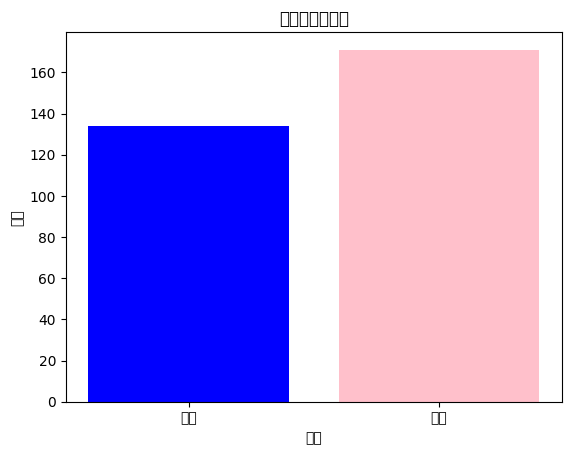

总样本数量: 305
男生数量: 134, 占比: 43.93%
女生数量: 171, 占比: 56.07%
           gender         age  occupation  \
count  305.000000  305.000000  305.000000   
mean     1.560656    2.190164    1.845902   
std      0.497123    0.800843    0.826688   
min      1.000000    1.000000    1.000000   
25%      1.000000    2.000000    1.000000   
50%      2.000000    2.000000    2.000000   
75%      2.000000    3.000000    2.000000   
max      2.000000    4.000000    4.000000   

       Received vocational education or not  \
count                            305.000000   
mean                               0.537705   
std                                0.499396   
min                                0.000000   
25%                                0.000000   
50%                                1.000000   
75%                                1.000000   
max                                1.000000   

       Hours of independent study per week  \
count                           305.000000   
mean                   

In [6]:
#性别结构
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 统计男生和女生的数量
male_count = (df['gender'] == 1).sum()
female_count = (df['gender'] == 2).sum()

# 准备数据
genders = ['男生', '女生']
counts = [male_count, female_count]

# 创建柱状图
plt.bar(genders, counts, color=['blue', 'pink'])

# 添加标签和标题
plt.xlabel('性别')
plt.ylabel('数量')
plt.title('性别分布柱状图')

# 显示柱状图
plt.show()

# 计算男女比例
total_count = len(df)
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# 打印统计结果
print(f'总样本数量: {total_count}')
print(f'男生数量: {male_count}, 占比: {male_percentage:.2f}%')
print(f'女生数量: {female_count}, 占比: {female_percentage:.2f}%')

# 其他描述性统计
summary_statistics = df.describe()

# 打印均值、标准差、最小值、最大值等统计信息
print(summary_statistics)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

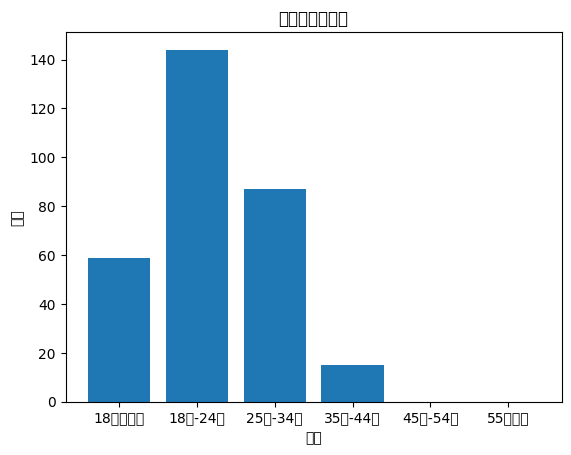

总样本数量: 305
18岁以下的数量: 59, 占比: 19.34%
18岁-24岁的数量: 144, 占比: 47.21%
25岁-34岁的数量: 87, 占比: 28.52%
35岁-44岁的数量: 15, 占比: 4.92%


In [10]:
#年龄结构
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 统计男生和女生的数量
under_18 = (df['age'] == 1).sum()#18岁以下的
age18_24 = (df['age'] == 2).sum()#18岁-24岁
age25_34 = (df['age'] == 3).sum()#25岁-34岁
age35_44 = (df['age'] == 4).sum()#35岁-44岁
age45_54 = (df['age'] == 5).sum()#45岁-54岁
dayu_55 = (df['age'] == 6).sum()#55岁以上

# 准备数据
ages = ['18岁以下的', '18岁-24岁','25岁-34岁','35岁-44岁','45岁-54岁','55岁以上']
counts = [under_18, age18_24,age25_34,age35_44,age45_54,dayu_55]

# 创建柱状图
plt.bar(ages, counts)

# 添加标签和标题
plt.xlabel('年龄')
plt.ylabel('数量')
plt.title('性别分布柱状图')

# 显示柱状图
plt.show()

# 计算男女比例
total_count = len(df)
under_18_percentage = (under_18 / total_count) * 100
age18_24_percentage = (age18_24 / total_count) * 100
age25_34_percentage = (age25_34 / total_count) * 100
age35_44_percentage = (age35_44 / total_count) * 100
age45_54_percentage = (age45_54/ total_count) * 100
dayu_55_percentage = (dayu_55 / total_count) * 100
# 打印统计结果
print(f'总样本数量: {total_count}')
print(f'18岁以下的数量: {under_18}, 占比: {under_18_percentage:.2f}%')
print(f'18岁-24岁的数量: {age18_24}, 占比: {age18_24_percentage:.2f}%')
print(f'25岁-34岁的数量: {age25_34}, 占比: {age25_34_percentage:.2f}%')
print(f'35岁-44岁的数量: {age35_44}, 占比: {age35_44_percentage:.2f}%')

# 其他描述性统计
# summary_statistics = df.describe()

# # 打印均值、标准差、最小值、最大值等统计信息
# print(summary_statistics)

职业数据的描述性统计:
count    305.000000
mean       1.845902
std        0.826688
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: occupation, dtype: float64

各职业人数统计:
2    123
1    120
3     51
4     11
Name: occupation, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32844 (\N{CJK UNIFIED IDEOGRAPH-804C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

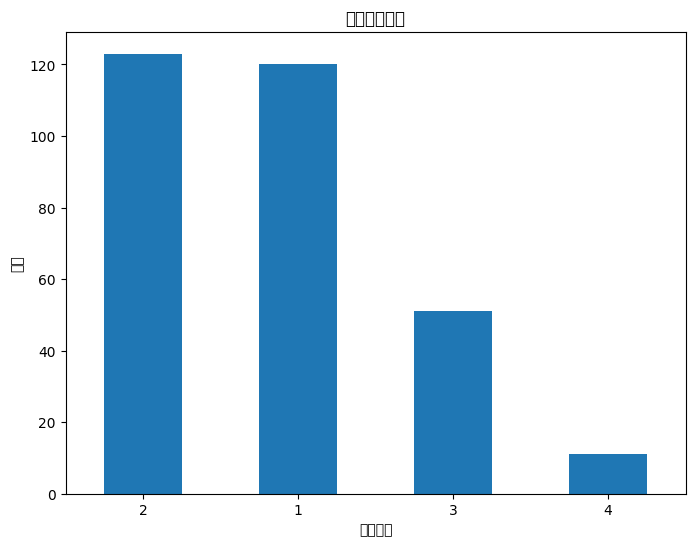

In [15]:
#职业信息
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个示例Excel数据，你需要替换成你的实际数据文件
# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 描述性统计
occupation_counts = df['occupation'].value_counts()
occupation_counts_descriptive = df['occupation'].describe()

# 打印描述性统计结果
print("职业数据的描述性统计:")
print(occupation_counts_descriptive)
print("\n各职业人数统计:")
print(occupation_counts)

# 绘制柱状图
plt.figure(figsize=(8, 6))
occupation_counts.plot(kind='bar', rot=0)
plt.title('职业数据分布')
plt.xlabel('职业类型')
plt.ylabel('人数')
plt.show()

是否接受过职业教育的描述性统计:
count    305.000000
mean       0.537705
std        0.499396
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Received vocational education or not, dtype: float64

接受过职业教育与否统计:
1    164
0    141
Name: Received vocational education or not, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25509 (\N{CJK UNIFIED IDEOGRAPH-63A5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

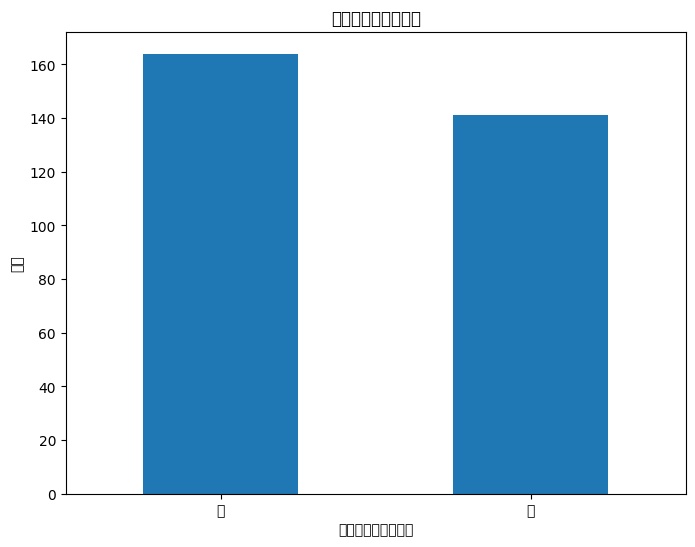

In [16]:
#是否接受过职业教育
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个示例Excel数据，你需要替换成你的实际数据文件

# 创建DataFrame
# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 描述性统计
education_counts = df['Received vocational education or not'].value_counts()
education_counts_descriptive = df['Received vocational education or not'].describe()

# 打印描述性统计结果
print("是否接受过职业教育的描述性统计:")
print(education_counts_descriptive)
print("\n接受过职业教育与否统计:")
print(education_counts)

# 绘制柱状图
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', rot=0)
plt.title('是否接受过职业教育')
plt.xlabel('是否接受过职业教育')
plt.ylabel('人数')
plt.xticks([0, 1], ['否', '是'])  # 自定义x轴标签
plt.show()

独立学习每周小时数的描述性统计:
count        305
unique         4
top       5-10小时
freq         149
Name: Hours of independent study per week, dtype: object

不同小时范围的人数统计:
5-10小时     149
10-15小时     89
0-5小时       54
15小时以上      13
Name: Hours of independent study per week, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29420 (\N{CJK UNIFIED IDEOGRAPH-72EC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31435 (\N{CJK UNIFIED IDEOGRAPH-7ACB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

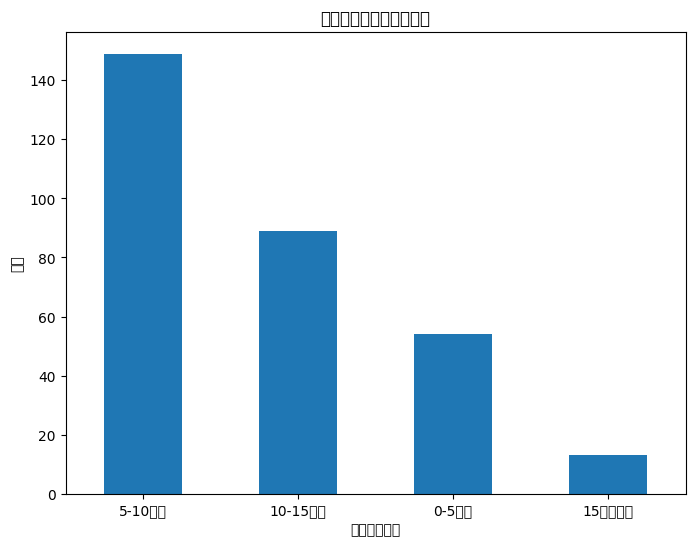

In [17]:
#每周学习时长
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 将数值编码映射为具体的小时范围
hour_ranges = {
    1: '0-5小时',
    2: '5-10小时',
    3: '10-15小时',
    4: '15小时以上'
}
df['Hours of independent study per week'] = df['Hours of independent study per week'].map(hour_ranges)

# 描述性统计
study_hours_counts = df['Hours of independent study per week'].value_counts()
study_hours_counts_descriptive = df['Hours of independent study per week'].describe()

# 打印描述性统计结果
print("独立学习每周小时数的描述性统计:")
print(study_hours_counts_descriptive)
print("\n不同小时范围的人数统计:")
print(study_hours_counts)

# 绘制柱状图
plt.figure(figsize=(8, 6))
study_hours_counts.plot(kind='bar', rot=0)
plt.title('独立学习每周小时数分布')
plt.xlabel('学习小时范围')
plt.ylabel('人数')
plt.show()

Knowledge of the new Vocational Education Act的描述性统计:
count    305.000000
mean       3.016393
std        0.821019
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Knowledge of the new Vocational Education Act, dtype: float64

Knowledge of the new Vocational Education Act的统计结果:
3    148
4     89
2     52
1     16
Name: Knowledge of the new Vocational Education Act, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

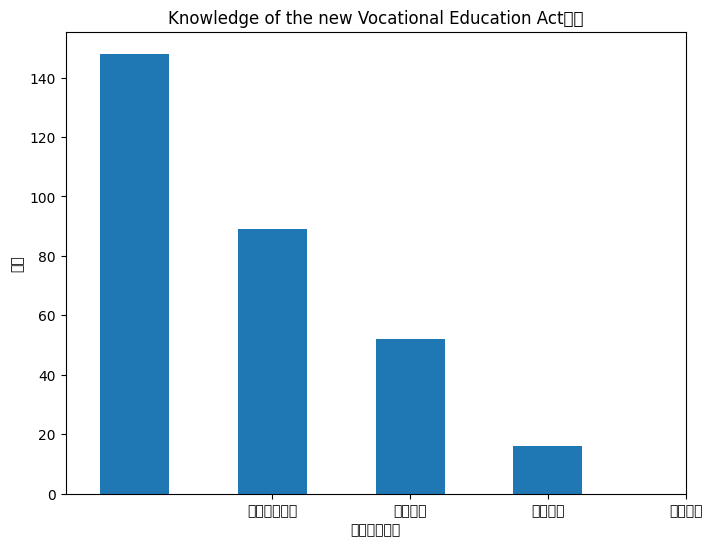

Favors for equal status的描述性统计:
count    305.000000
mean       2.131148
std        1.023979
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Favors for equal status, dtype: float64

Favors for equal status的统计结果:
2    140
1     85
3     47
4     21
5     12
Name: Favors for equal status, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

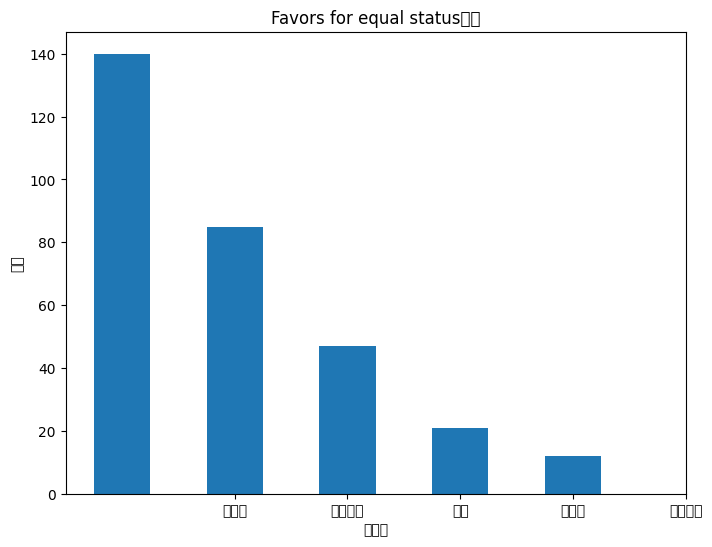

Does it promote equity in education的描述性统计:
count    305.000000
mean       0.524590
std        0.500216
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Does it promote equity in education, dtype: float64

Does it promote equity in education的统计结果:
1    160
0    145
Name: Does it promote equity in education, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20419 (\N{CJK UNIFIED IDEOGRAPH-4FC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

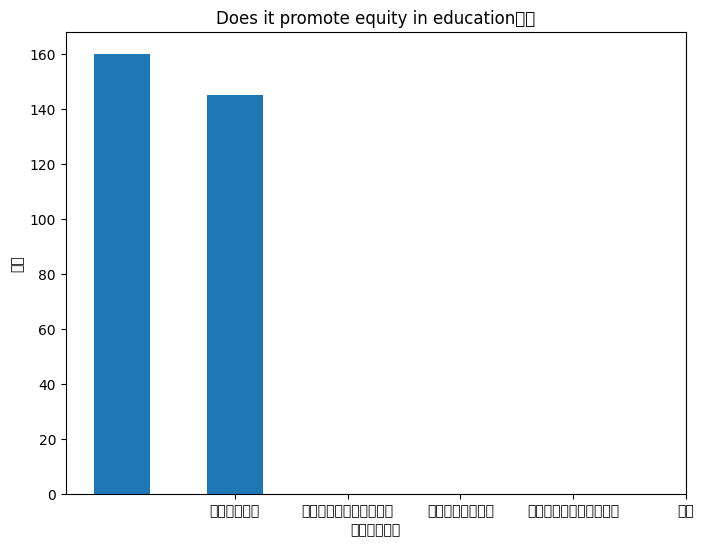

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 描述性统计和绘制柱状图函数
def descriptive_statistics_and_plot(column_name, x_labels):
    counts = df[column_name].value_counts()
    descriptive_stats = df[column_name].describe()

    print(f"{column_name}的描述性统计:")
    print(descriptive_stats)
    print(f"\n{column_name}的统计结果:")
    print(counts)

    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', rot=0)
    plt.title(f'{column_name}分布')
    plt.xlabel(x_labels[0])
    plt.ylabel('人数')
    plt.xticks(range(1, len(x_labels) + 1), x_labels)
    plt.show()

# 对新《职业教育法》的了解程度
knowledge_column_name = 'Knowledge of the new Vocational Education Act'
knowledge_x_labels = ['完全没有了解', '了解一些', '大致了解', '十分了解']
descriptive_statistics_and_plot(knowledge_column_name, knowledge_x_labels)

# 新法中“职业教育和普通教育同等重要”的看法
importance_column_name = 'Favors for equal status'
importance_x_labels = ['很赞成', '比较赞成', '一般', '不赞成', '很不赞成']
descriptive_statistics_and_plot(importance_column_name, importance_x_labels)

# 新《职业教育法》带来的影响
impact_column_name = 'Does it promote equity in education'
impact_x_labels = [
    '促进教育公平',
    '提高职业教育的人才培养',
    '改善职校教学环境',
    '促进更多人选择职业教育',
    '其他'
]
descriptive_statistics_and_plot(impact_column_name, impact_x_labels)

列联表分析
学校教育基本情况的列联表分析(用于探究本科生以及职高生对于学校的满意程度)

列联表:
Overall school satisfaction  1   2   3   4   5
occupation                                    
1                            2   9  35  60  14
2                            2  12  29  61  19
3                            0   4  13  25   9
4                            0   3   3   2   3

Chi-squared检验结果:
Chi-squared统计量: 10.641579875055934
P值: 0.5598590484558592
两个变量之间不存在关联性（接受原假设）。


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20004 (\N{CJK UNIFIED IDEOGRAPH-4E24}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

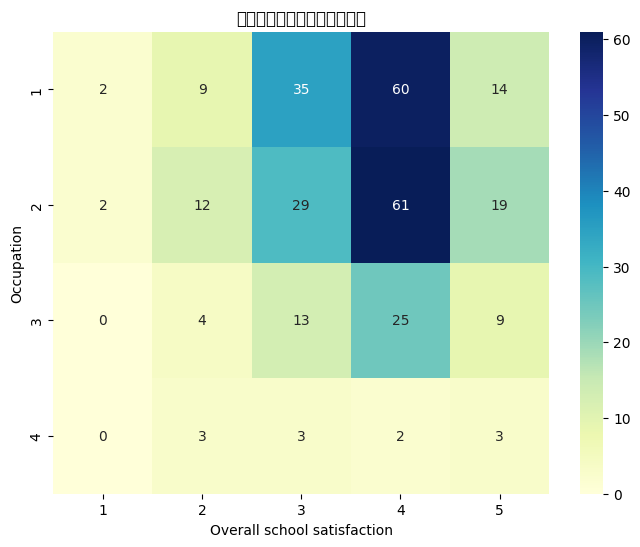

In [22]:
import pandas as pd
import scipy.stats as stats

# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 创建列联表
contingency_table = pd.crosstab(df['occupation'], df['Overall school satisfaction'])

# 打印列联表
print("列联表:")
print(contingency_table)

# 进行Chi-squared检验
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# 打印Chi-squared检验结果
print("\nChi-squared检验结果:")
print(f"Chi-squared统计量: {chi2}")
print(f"P值: {p}")

# 判断关联性
alpha = 0.05  # 设置显著性水平
if p < alpha:
    print("两个变量之间存在关联性（拒绝原假设）。")
else:
    print("两个变量之间不存在关联性（接受原假设）。")

# 绘制关联性图表
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('两个变量之间的关联性热力图')
plt.xlabel('Overall school satisfaction')
plt.ylabel('Occupation')
plt.show()

卡方检验
周均学习时间与学生种类之间的卡方检验

In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats


# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 创建列联表
contingency_table = pd.crosstab(df['occupation'], df['Hours of independent study per week'])

# 打印卡方检验结果
print("Chi-squared统计量:", chi2)
print("P值:", p)

# 判断关联性
alpha = 0.05  # 设置显著性水平
if p < alpha:
    print("两个变量之间存在关联性（拒绝原假设）。")
else:
    print("两个变量之间不存在关联性（接受原假设）。")

Chi-squared统计量: 10.641579875055934
P值: 0.5598590484558592
两个变量之间不存在关联性（接受原假设）。


社会认可度的描述性统计

Degree of improvement in the quality of vocational education after the implementation of the new Vocational Education Act的描述性统计:
count    305.000000
mean       2.327869
std        0.864530
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Degree of improvement in the quality of vocational education after the implementation of the new Vocational Education Act, dtype: float64

Degree of improvement in the quality of vocational education after the implementation of the new Vocational Education Act的统计结果:
2    147
3     84
1     45
4     26
5      3
Name: Degree of improvement in the quality of vocational education after the implementation of the new Vocational Education Act, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

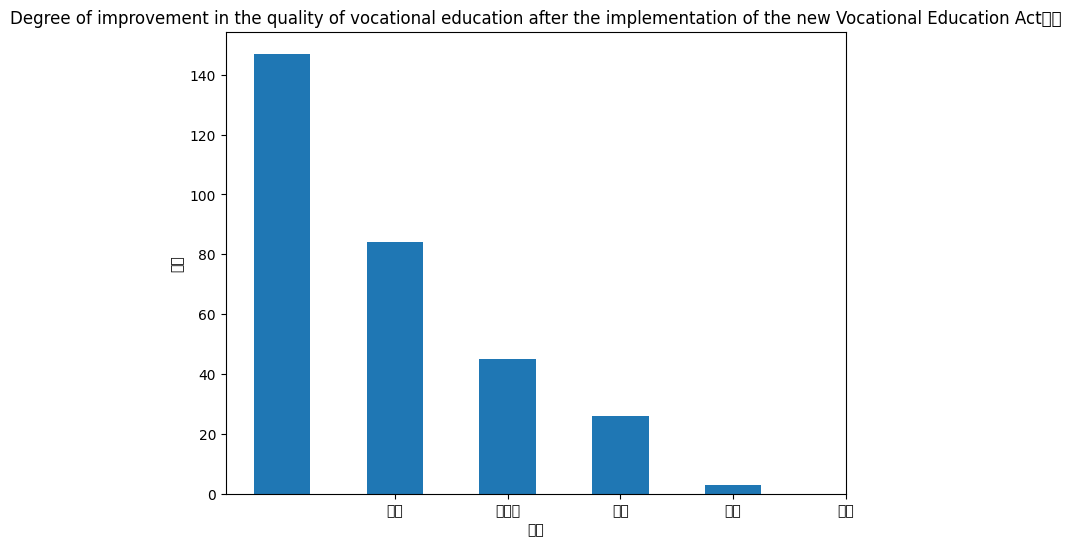

Extent of support for parity after implementation of the law的描述性统计:
count    305.000000
mean       2.327869
std        0.919835
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Extent of support for parity after implementation of the law, dtype: float64

Extent of support for parity after implementation of the law的统计结果:
2    134
3     84
1     54
4     29
5      4
Name: Extent of support for parity after implementation of the law, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

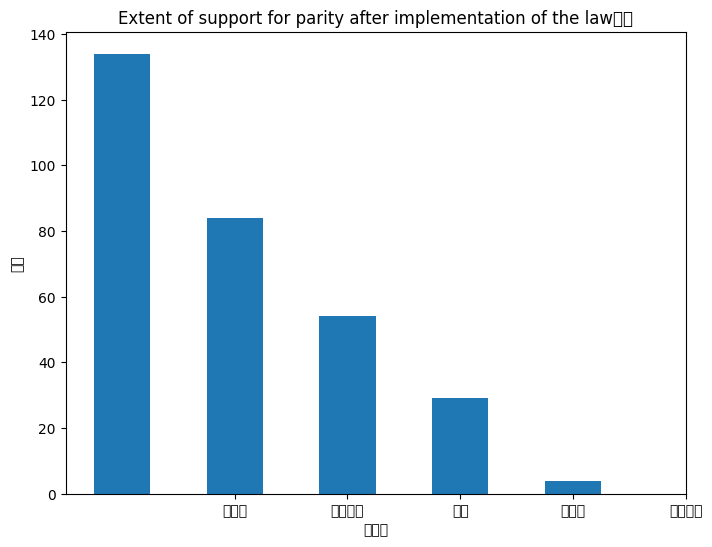

Prospects for the development of vocational education in Zhejiang Province的描述性统计:
count    305.000000
mean       2.308197
std        0.825238
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Prospects for the development of vocational education in Zhejiang Province, dtype: float64

Prospects for the development of vocational education in Zhejiang Province的统计结果:
2    165
3     75
1     38
4     24
5      3
Name: Prospects for the development of vocational education in Zhejiang Province, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

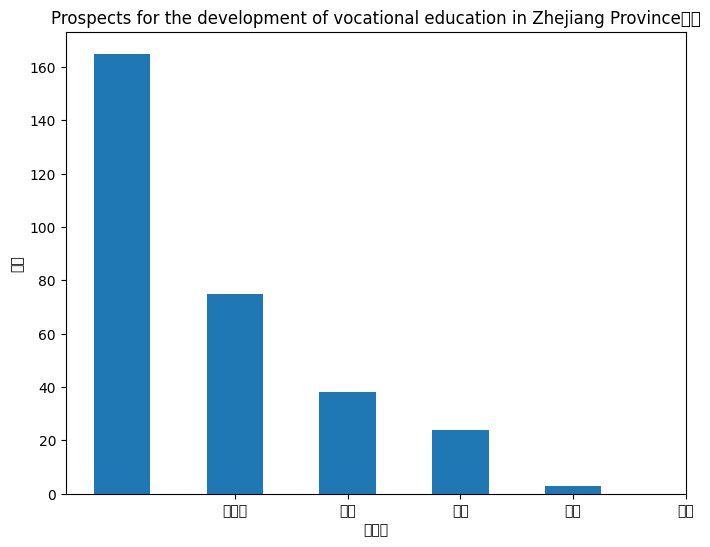

Perceived Recognition of Qualifications of Graduates of Vocational Education in Zhejiang Province的描述性统计:
count    305.000000
mean       2.354098
std        0.891770
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Perceived Recognition of Qualifications of Graduates of Vocational Education in Zhejiang Province, dtype: float64

Perceived Recognition of Qualifications of Graduates of Vocational Education in Zhejiang Province的统计结果:
2    130
3     95
1     50
4     27
5      3
Name: Perceived Recognition of Qualifications of Graduates of Vocational Education in Zhejiang Province, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

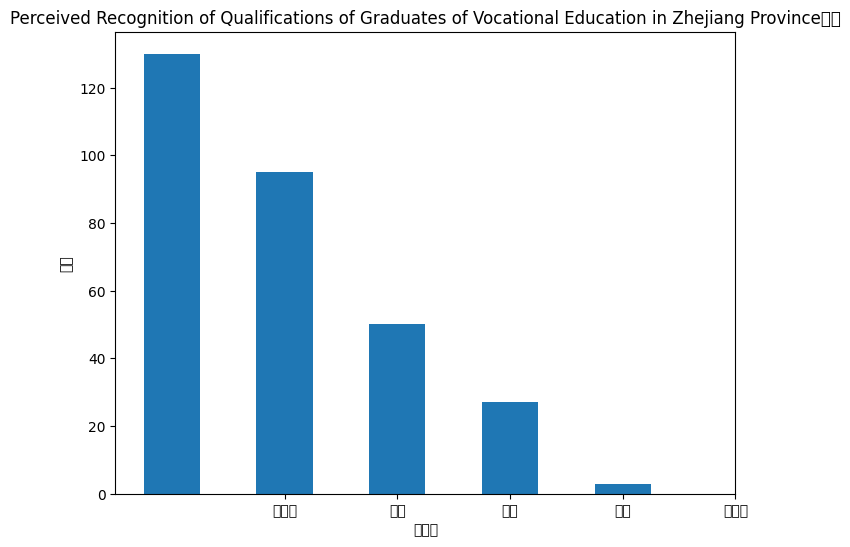

Will consider going to college.的描述性统计:
count    305.000000
mean       1.885246
std        0.564823
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Will consider going to college., dtype: float64

Will consider going to college.的统计结果:
2    204
1     68
3     33
Name: Will consider going to college., dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

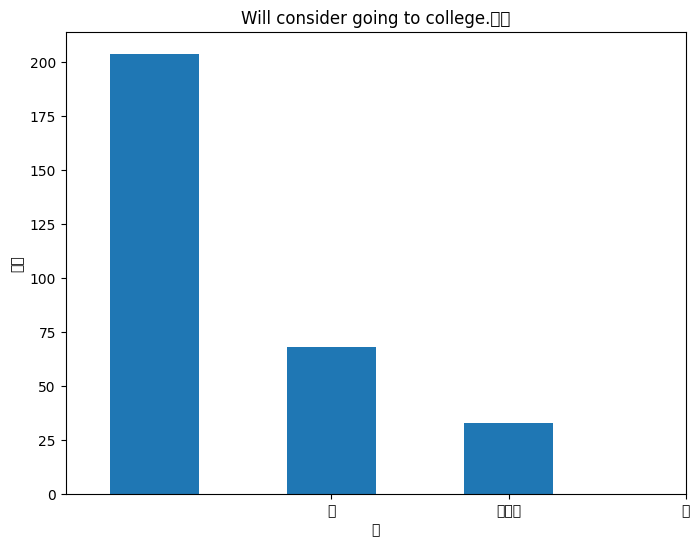

Does it promote equity in education的描述性统计:
count    305.000000
mean       0.524590
std        0.500216
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Does it promote equity in education, dtype: float64

Does it promote equity in education的统计结果:
1    160
0    145
Name: Does it promote equity in education, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20419 (\N{CJK UNIFIED IDEOGRAPH-4FC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

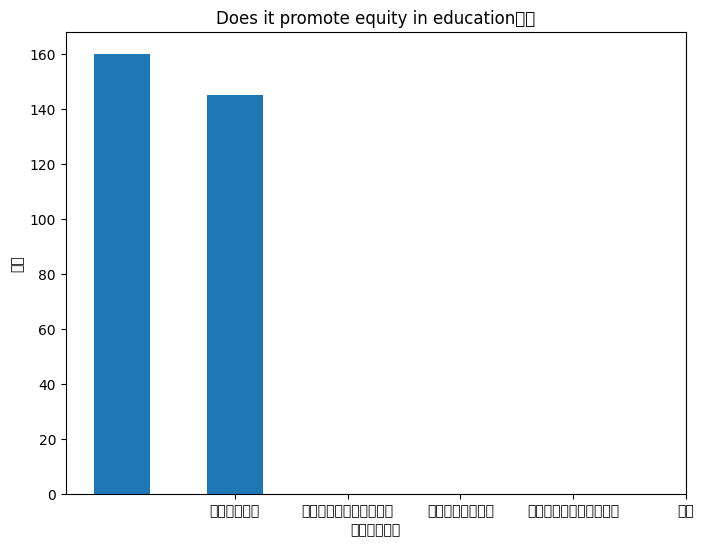

Whether the implementation of the new Vocational Education 6 Act is considered to have a positive effect on the optimization of vocational education in Zhejiang Province的描述性统计:
count    305.000000
mean       2.285246
std        0.873935
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Whether the implementation of the new Vocational Education 6 Act is considered to have a positive effect on the optimization of vocational education in Zhejiang Province, dtype: float64

Whether the implementation of the new Vocational Education 6 Act is considered to have a positive effect on the optimization of vocational education in Zhejiang Province的统计结果:
2    146
3     82
1     51
4     22
5      4
Name: Whether the implementation of the new Vocational Education 6 Act is considered to have a positive effect on the optimization of vocational education in Zhejiang Province, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

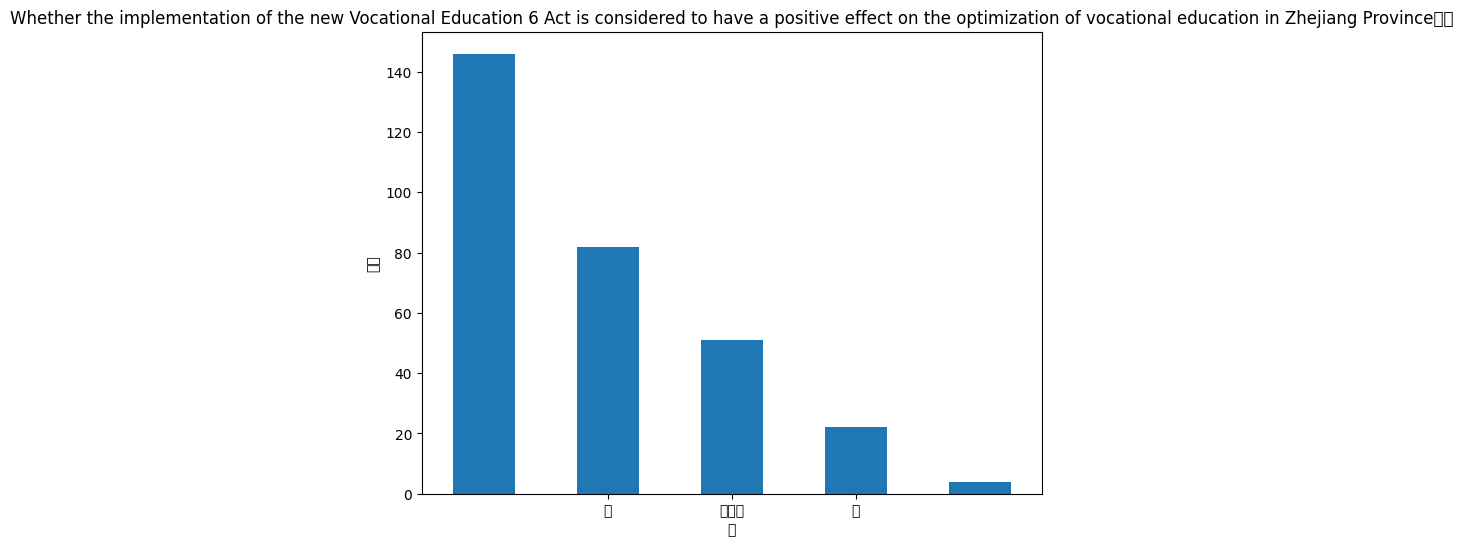

Does it promote equity in education的描述性统计:
count    305.000000
mean       0.524590
std        0.500216
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Does it promote equity in education, dtype: float64

Does it promote equity in education的统计结果:
1    160
0    145
Name: Does it promote equity in education, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20419 (\N{CJK UNIFIED IDEOGRAPH-4FC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

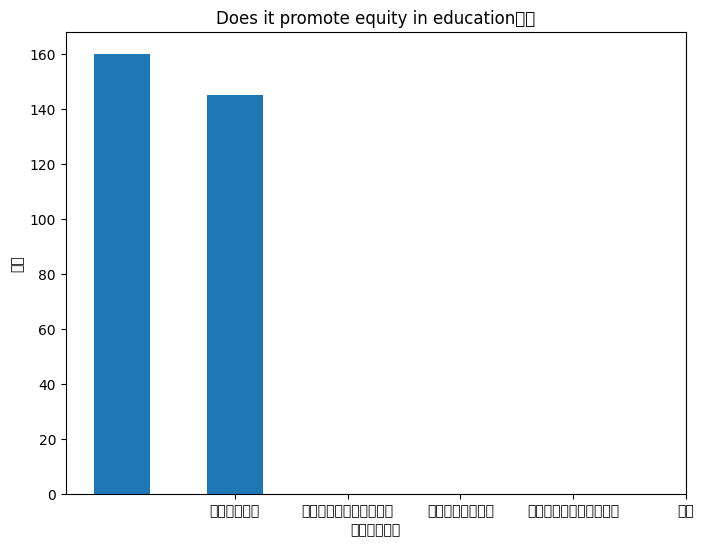

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 描述性统计和绘制柱状图函数
def descriptive_statistics_and_plot(column_name, x_labels):
    counts = df[column_name].value_counts()
    descriptive_stats = df[column_name].describe()

    print(f"{column_name}的描述性统计:")
    print(descriptive_stats)
    print(f"\n{column_name}的统计结果:")
    print(counts)

    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', rot=0)
    plt.title(f'{column_name}分布')
    plt.xlabel(x_labels[0])
    plt.ylabel('人数')
    plt.xticks(range(1, len(x_labels) + 1), x_labels)
    plt.show()

# 职业教育的质量提升
knowledge_column_name = 'Degree of improvement in the quality of vocational education after the implementation of the new Vocational Education Act'
knowledge_x_labels = ['很大', '比较大', '一般', '些许', '没有']
descriptive_statistics_and_plot(knowledge_column_name, knowledge_x_labels)

# 职业教育和普通教育的平等程度
importance_column_name = 'Extent of support for parity after implementation of the law'
importance_x_labels = ['很支持', '比较支持', '一般', '不支持', '很不支持']
descriptive_statistics_and_plot(importance_column_name, importance_x_labels)

# 职业教育的发展前景
knowledge_column_name = 'Prospects for the development of vocational education in Zhejiang Province'
knowledge_x_labels = ['非常好', '较好', '一般', '较差', '很差']
descriptive_statistics_and_plot(knowledge_column_name, knowledge_x_labels)

# 学历认可度
knowledge_column_name = 'Perceived Recognition of Qualifications of Graduates of Vocational Education in Zhejiang Province'
knowledge_x_labels = ['非常高', '较高', '一般', '较低', '非常低']
descriptive_statistics_and_plot(knowledge_column_name, knowledge_x_labels)
# 专升本意愿
knowledge_column_name = 'Will consider going to college.'
knowledge_x_labels = ['是', '不确定', '否']
descriptive_statistics_and_plot(knowledge_column_name, knowledge_x_labels)
descriptive_statistics_and_plot(impact_column_name, impact_x_labels)

# 专升本竞争力提升程度
knowledge_column_name = 'Whether the implementation of the new Vocational Education 6 Act is considered to have a positive effect on the optimization of vocational education in Zhejiang Province'
knowledge_x_labels = ['是', '不确定', '否']
descriptive_statistics_and_plot(knowledge_column_name, knowledge_x_labels)
descriptive_statistics_and_plot(impact_column_name, impact_x_labels)

以“Degree of improvement in the quality of vocational education after the implementation of the new Vocational Education Act”为标签进行KNN分类分析，不是三维以下无法画图。

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 准备特征和目标变量
X = df.drop('Degree of improvement in the quality of vocational education after the implementation of the new Vocational Education Act', axis=1)  # 特征
y = df['Degree of improvement in the quality of vocational education after the implementation of the new Vocational Education Act']  # 目标变量

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化KNN分类器，选择合适的K值
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # 可以根据需要调整K值

# 训练KNN分类器
knn_classifier.fit(X_train, y_train)

# 预测测试集
y_pred = knn_classifier.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确度: {accuracy}")

模型准确度: 0.6065573770491803


不同年龄对学校整体满意程度的差异性分析

要进行不同年龄对学校整体满意程度的差异性分析，你可以使用统计方法，如方差分析（ANOVA）或非参数检验方法，比如Kruskal-Wallis检验（适用于非正态分布的数据）。以下是一个示例Python代码，演示如何执行这种分析：

首先，假设你有一个包含年龄和整体满意度的数据集，可以使用Pandas加载它。然后，你可以使用SciPy库来执行Kruskal-Wallis检验。

In [27]:
import pandas as pd
from scipy.stats import kruskal

# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 分割数据集为不同年龄组
age_groups = []
for age in df['age'].unique():
    age_groups.append(df[df['age'] == age]['Overall school satisfaction'])

# 执行Kruskal-Wallis检验
statistic, p_value = kruskal(*age_groups)

# 打印Kruskal-Wallis检验结果
print(f"Kruskal-Wallis统计量: {statistic}")
print(f"P值: {p_value}")

# 判断不同年龄组是否存在满意度差异
alpha = 0.05  # 设置显著性水平
if p_value < alpha:
    print("\n不同年龄组之间存在满意度差异（拒绝原假设）。")
else:
    print("\n不同年龄组之间不存在满意度差异（接受原假设）。")

Kruskal-Wallis统计量: 4.7521376716559995
P值: 0.19087294671106783

不同年龄组之间不存在满意度差异（接受原假设）。


数据符合正态分布，也可以考虑使用ANOVA进行分析。

In [28]:
import pandas as pd
from scipy.stats import f_oneway

# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 分割数据集为不同年龄组
age_groups = {}
for age in df['age'].unique():
    age_groups[age] = df[df['age'] == age]['Overall school satisfaction']

# 执行单因素方差分析 (One-way ANOVA)
statistic, p_value = f_oneway(*age_groups.values())

# 打印ANOVA分析结果
print(f"One-way ANOVA统计量: {statistic}")
print(f"P值: {p_value}")

# 判断不同年龄组是否存在满意度差异
alpha = 0.05  # 设置显著性水平
if p_value < alpha:
    print("\n不同年龄组之间存在满意度差异（拒绝原假设）。")
else:
    print("\n不同年龄组之间不存在满意度差异（接受原假设）。")

One-way ANOVA统计量: 1.7645440670097061
P值: 0.1539623557893071

不同年龄组之间不存在满意度差异（接受原假设）。
